In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_set=pd.read_excel(r"/Users/suchitsharma/Downloads/Data_Train.xlsx")

In [3]:
train_set.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_set['Arrival_Time']

0        01:10 22 Mar
1               13:15
2        04:25 10 Jun
3               23:30
4               21:35
             ...     
10678           22:25
10679           23:20
10680           11:20
10681           14:10
10682           19:15
Name: Arrival_Time, Length: 10683, dtype: object

In [5]:
train_set.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [6]:
#since missing values are very less , I can simply drop them.
train_set=train_set.dropna()

In [7]:
train_set.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_set.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
def convert(col):
    train_set[col]=pd.to_datetime(train_set[col])
    

In [10]:
for i in ['Date_of_Journey','Arrival_Time','Dep_Time']:
    convert(i)

/var/folders/1r/d9gtx_q511v7f19mk0_z468r0000gn/T/ipykernel_63296/3465781491.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_set[col]=pd.to_datetime(train_set[col])


In [11]:
train_set['Arrival_Time']

0       2023-03-22 01:10:00
1       2023-09-17 13:15:00
2       2023-06-10 04:25:00
3       2023-09-17 23:30:00
4       2023-09-17 21:35:00
                ...        
10678   2023-09-17 22:25:00
10679   2023-09-17 23:20:00
10680   2023-09-17 11:20:00
10681   2023-09-17 14:10:00
10682   2023-09-17 19:15:00
Name: Arrival_Time, Length: 10682, dtype: datetime64[ns]

In [12]:
train_set.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [13]:
train_set['Arrival_day']=train_set['Arrival_Time'].dt.day
train_set['Arrival_month']=train_set['Arrival_Time'].dt.month
train_set['Arrival_year']=train_set['Arrival_Time'].dt.year


In [14]:
train_set["Journey_day"] = train_set['Date_of_Journey'].dt.day
train_set["Journey_month"] = train_set['Date_of_Journey'].dt.month
train_set["Journey_year"] = train_set['Date_of_Journey'].dt.year


In [15]:
train_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Arrival_day,Arrival_month,Arrival_year,Journey_day,Journey_month,Journey_year
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-17 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,22,3,2023,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-17 05:50:00,2023-09-17 13:15:00,7h 25m,2 stops,No info,7662,17,9,2023,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-17 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,10,6,2023,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-09-17 18:05:00,2023-09-17 23:30:00,5h 25m,1 stop,No info,6218,17,9,2023,5,12,2019
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-09-17 16:50:00,2023-09-17 21:35:00,4h 45m,1 stop,No info,13302,17,9,2023,3,1,2019


In [16]:
def extract_hour_min(col):
    train_set[col+"_hour"] = train_set[col].dt.hour
    train_set[col+"_minute"] = train_set[col].dt.minute


In [17]:
for i in ['Arrival_Time','Dep_Time']:
    extract_hour_min(i)

In [18]:
train_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,Arrival_day,Arrival_month,Arrival_year,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-17 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,...,22,3,2023,24,3,2019,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-17 05:50:00,2023-09-17 13:15:00,7h 25m,2 stops,No info,...,17,9,2023,5,1,2019,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-17 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,...,10,6,2023,6,9,2019,4,25,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-09-17 18:05:00,2023-09-17 23:30:00,5h 25m,1 stop,No info,...,17,9,2023,5,12,2019,23,30,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-09-17 16:50:00,2023-09-17 21:35:00,4h 45m,1 stop,No info,...,17,9,2023,3,1,2019,21,35,16,50


In [19]:
#dropping these columns because we already extracted important info and date in the given columns was incorrect
drop_columns=['Dep_Time','Arrival_Time']
train_set.drop(drop_columns,axis=1,inplace=True)

In [20]:
train_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_day,Arrival_month,Arrival_year,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,3,2023,24,3,2019,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,17,9,2023,5,1,2019,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,10,6,2023,6,9,2019,4,25,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,17,9,2023,5,12,2019,23,30,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,17,9,2023,3,1,2019,21,35,16,50


In [21]:
def flight_dep_time(x):

    if (x>4) and (x<=8):
        return "Early Morning"

    elif (x>8) and (x<=12):
        return "Morning"

    elif (x>12) and (x<=16):
        return "Noon"

    elif (x>16) and (x<=20):
        return "Evening"

    elif (x>20) and (x<=24):
        return "Night"

    else:
        return "late night"

In [22]:
train_set['Dep_Time_hour'].apply(flight_dep_time)

0                Night
1        Early Morning
2              Morning
3              Evening
4                 Noon
             ...      
10678          Evening
10679          Evening
10680    Early Morning
10681          Morning
10682          Morning
Name: Dep_Time_hour, Length: 10682, dtype: object

In [23]:
values=train_set['Dep_Time_hour'].apply(flight_dep_time).value_counts()
values

Early Morning    2880
Evening          2357
Morning          2209
Noon             1731
Night            1040
late night        465
Name: Dep_Time_hour, dtype: int64

<Axes: >

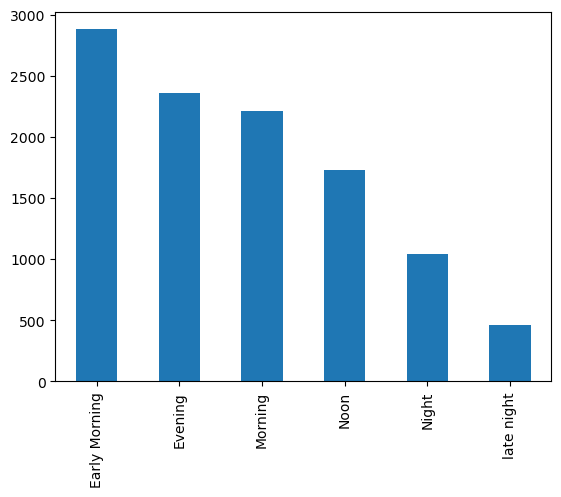

In [24]:
values.plot(kind='bar')

In [25]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()
values.iplot(kind='bar')

In [26]:
def process_duration(duration):
    if 'h' not in duration:
        duration = '0h' + ' ' + duration
    elif 'm' not in duration:
        duration = duration + ' ' +'0m'

    return duration

In [27]:
train_set['Duration'] = train_set['Duration'].apply(process_duration)

In [28]:
train_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_day,Arrival_month,Arrival_year,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,3,2023,24,3,2019,1,10,22,20
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,17,9,2023,5,1,2019,13,15,5,50
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,10,6,2023,6,9,2019,4,25,9,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,17,9,2023,5,12,2019,23,30,18,5
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,17,9,2023,3,1,2019,21,35,16,50


In [29]:
train_set['Duration'][0].split()[0][0:-1]

'2'

In [30]:
train_set['Duration_hour']=train_set['Duration'].apply((lambda x: x.split()[0][0:-1]))

In [31]:
train_set['Duration_min']=train_set['Duration'].apply((lambda x: x.split()[1][0:-1]))

In [32]:
type(train_set['Duration_hour'][0])

str

In [33]:
train_set['Duration_hour']=(train_set['Duration_hour']).astype(int)
train_set['Duration_min']=(train_set['Duration_min']).astype(int)

In [34]:
type(train_set['Duration_hour'][0])


numpy.int64

In [35]:
train_set

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_day,...,Arrival_year,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,...,2023,24,3,2019,1,10,22,20,2,50
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,17,...,2023,5,1,2019,13,15,5,50,7,25
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,10,...,2023,6,9,2019,4,25,9,25,19,0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,17,...,2023,5,12,2019,23,30,18,5,5,25
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,17,...,2023,3,1,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,17,...,2023,4,9,2019,22,25,19,55,2,30
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,17,...,2023,27,4,2019,23,20,20,45,2,35
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,17,...,2023,27,4,2019,11,20,8,20,3,0
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,17,...,2023,3,1,2019,14,10,11,30,2,40


In [36]:
train_set['total_mins']=train_set['Duration_hour']*60+ train_set['Duration_min']

In [37]:
train_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_day,...,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,...,24,3,2019,1,10,22,20,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,17,...,5,1,2019,13,15,5,50,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,10,...,6,9,2019,4,25,9,25,19,0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,17,...,5,12,2019,23,30,18,5,5,25,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,17,...,3,1,2019,21,35,16,50,4,45,285


<Axes: xlabel='total_mins', ylabel='Price'>

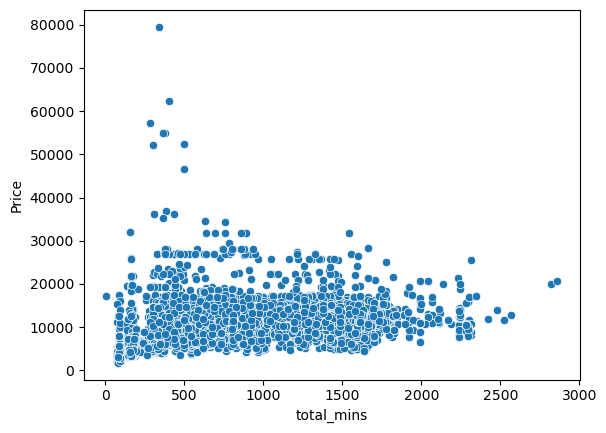

In [38]:

sns.scatterplot(x='total_mins',y='Price',data=train_set)

<Axes: xlabel='total_mins', ylabel='Price'>

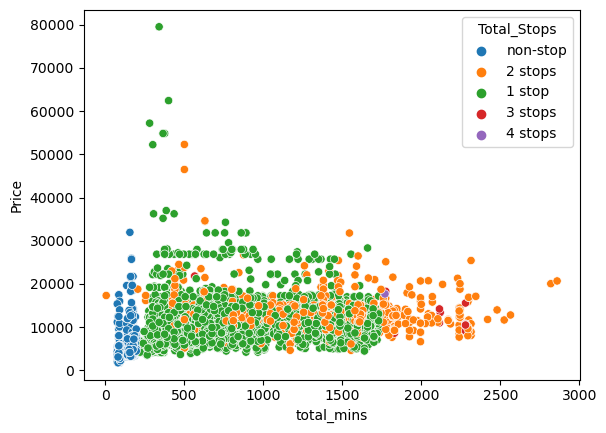

In [39]:
sns.scatterplot(x="total_mins" , y="Price" , hue="Total_Stops", data=train_set)

In [40]:
train_set[train_set['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

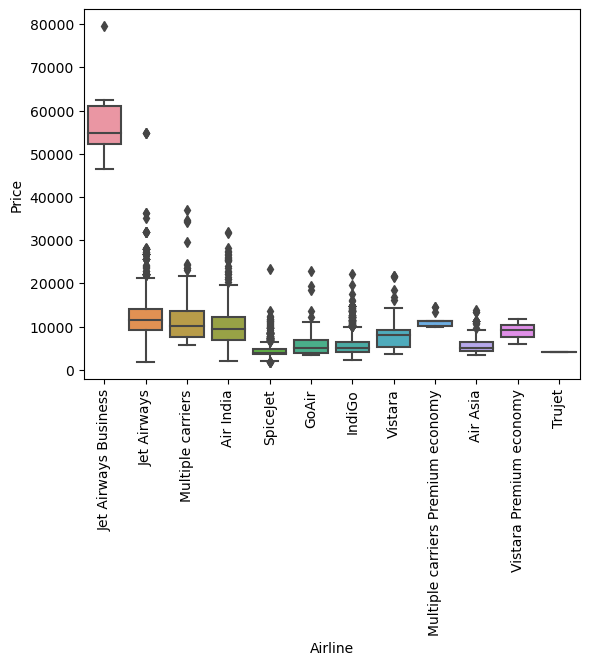

In [41]:
sns.boxplot(y='Price' , x='Airline' , data=train_set.sort_values('Price' , ascending=False))
plt.xticks(rotation="vertical")
plt.show()

In [42]:
train_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_day,...,Journey_day,Journey_month,Journey_year,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,total_mins
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,...,24,3,2019,1,10,22,20,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,17,...,5,1,2019,13,15,5,50,7,25,445
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,10,...,6,9,2019,4,25,9,25,19,0,1140
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,17,...,5,12,2019,23,30,18,5,5,25,325
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,17,...,3,1,2019,21,35,16,50,4,45,285


In [43]:
sub_category=train_set['Source'].unique()

In [44]:
sub_category

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [45]:
from sklearn.preprocessing import OneHotEncoder

In [46]:
column_name = 'Source'

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the selected column
train_set['Source_'+sub_category] = encoder.fit_transform(train_set[[column_name]])

/Users/suchitsharma/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [47]:
train_set.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,...,22,20,2,50,170,1.0,0.0,0.0,0.0,0.0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,17,...,5,50,7,25,445,0.0,0.0,0.0,1.0,0.0
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,10,...,9,25,19,0,1140,0.0,0.0,1.0,0.0,0.0
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,17,...,18,5,5,25,325,0.0,0.0,0.0,1.0,0.0
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,17,...,16,50,4,45,285,1.0,0.0,0.0,0.0,0.0


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_set['Airline'] = le.fit_transform(train_set['Airline'])

In [49]:
train_set

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,...,22,20,2,50,170,1.0,0.0,0.0,0.0,0.0
1,1,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,17,...,5,50,7,25,445,0.0,0.0,0.0,1.0,0.0
2,4,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,10,...,9,25,19,0,1140,0.0,0.0,1.0,0.0,0.0
3,3,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,17,...,18,5,5,25,325,0.0,0.0,0.0,1.0,0.0
4,3,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,17,...,16,50,4,45,285,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2019-09-04,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,17,...,19,55,2,30,150,0.0,0.0,0.0,1.0,0.0
10679,1,2019-04-27,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,17,...,20,45,2,35,155,0.0,0.0,0.0,1.0,0.0
10680,4,2019-04-27,Banglore,Delhi,BLR → DEL,3h 0m,non-stop,No info,7229,17,...,8,20,3,0,180,1.0,0.0,0.0,0.0,0.0
10681,10,2019-01-03,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,17,...,11,30,2,40,160,1.0,0.0,0.0,0.0,0.0


In [50]:
train_set['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [51]:
train_set['Destination'].replace('New Delhi' , 'Delhi' , inplace=True)

In [52]:
train_set['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [53]:
train_set['Destination']=le.fit_transform(train_set['Destination'])

In [54]:
train_set['Destination'].unique()

array([2, 0, 1, 4, 3])

In [55]:
train_set['Total_Stops']=le.fit_transform(train_set['Total_Stops'])


In [56]:
train_set

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Arrival_day,...,Dep_Time_hour,Dep_Time_minute,Duration_hour,Duration_min,total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,4,No info,3897,22,...,22,20,2,50,170,1.0,0.0,0.0,0.0,0.0
1,1,2019-01-05,Kolkata,0,CCU → IXR → BBI → BLR,7h 25m,1,No info,7662,17,...,5,50,7,25,445,0.0,0.0,0.0,1.0,0.0
2,4,2019-09-06,Delhi,1,DEL → LKO → BOM → COK,19h 0m,1,No info,13882,10,...,9,25,19,0,1140,0.0,0.0,1.0,0.0,0.0
3,3,2019-12-05,Kolkata,0,CCU → NAG → BLR,5h 25m,0,No info,6218,17,...,18,5,5,25,325,0.0,0.0,0.0,1.0,0.0
4,3,2019-01-03,Banglore,2,BLR → NAG → DEL,4h 45m,0,No info,13302,17,...,16,50,4,45,285,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,2019-09-04,Kolkata,0,CCU → BLR,2h 30m,4,No info,4107,17,...,19,55,2,30,150,0.0,0.0,0.0,1.0,0.0
10679,1,2019-04-27,Kolkata,0,CCU → BLR,2h 35m,4,No info,4145,17,...,20,45,2,35,155,0.0,0.0,0.0,1.0,0.0
10680,4,2019-04-27,Banglore,2,BLR → DEL,3h 0m,4,No info,7229,17,...,8,20,3,0,180,1.0,0.0,0.0,0.0,0.0
10681,10,2019-01-03,Banglore,2,BLR → DEL,2h 40m,4,No info,12648,17,...,11,30,2,40,160,1.0,0.0,0.0,0.0,0.0


In [57]:
train_set['Total_Stops'].unique()

array([4, 1, 0, 2, 3])

In [58]:
train_set.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Arrival_day',
       'Arrival_month', 'Arrival_year', 'Journey_day', 'Journey_month',
       'Journey_year', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Dep_Time_hour', 'Dep_Time_minute', 'Duration_hour', 'Duration_min',
       'total_mins', 'Source_Banglore', 'Source_Kolkata', 'Source_Delhi',
       'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [59]:
train_set.drop(columns=['Date_of_Journey' , 'Additional_Info' , 'Duration_min' ,'Duration_hour', 'Source' , 'Journey_year',] , axis=1 , inplace=True)
train_set.drop(columns=['Arrival_year'] , axis=1 , inplace=True)

In [60]:
train_set.drop(columns=['Duration','Route'] , axis=1 , inplace=True)

In [61]:
train_set

,Airline,Destination,Total_Stops,Price,Arrival_day,Arrival_month,Journey_day,Journey_month,Arrival_Time_hour,Arrival_Time_minute,Dep_Time_hour,Dep_Time_minute,total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,4,3897,22,3,24,3,1,10,22,20,170,1.0,0.0,0.0,0.0,0.0
1,1,0,1,7662,17,9,5,1,13,15,5,50,445,0.0,0.0,0.0,1.0,0.0
2,4,1,1,13882,10,6,6,9,4,25,9,25,1140,0.0,0.0,1.0,0.0,0.0
3,3,0,0,6218,17,9,5,12,23,30,18,5,325,0.0,0.0,0.0,1.0,0.0
4,3,2,0,13302,17,9,3,1,21,35,16,50,285,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,4,4107,17,9,4,9,22,25,19,55,150,0.0,0.0,0.0,1.0,0.0
10679,1,0,4,4145,17,9,27,4,23,20,20,45,155,0.0,0.0,0.0,1.0,0.0
10680,4,2,4,7229,17,9,27,4,11,20,8,20,180,1.0,0.0,0.0,0.0,0.0
10681,10,2,4,12648,17,9,3,1,14,10,11,30,160,1.0,0.0,0.0,0.0,0.0


/var/folders/1r/d9gtx_q511v7f19mk0_z468r0000gn/T/ipykernel_63296/3271681637.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Price', ylabel='Density'>

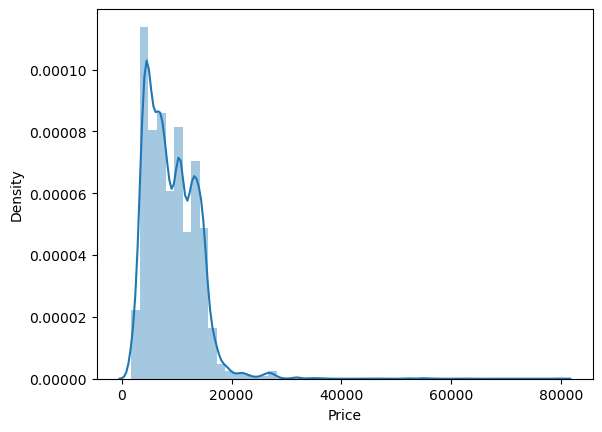

In [62]:
sns.distplot(train_set['Price'])

In [63]:
x=train_set.drop(['Price'],axis=1)
y=train_set['Price']
from sklearn.feature_selection import mutual_info_regression
priority=mutual_info_regression(x,y)

In [64]:
priority

array([1.31590822, 1.06881042, 0.78824828, 0.46509981, 0.55756801,
       0.62153101, 0.42366037, 1.1539184 , 0.89806221, 0.92411059,
       0.7557516 , 1.77333505, 0.39128728, 0.13033467, 0.52836077,
       0.46001517, 0.20412167])

In [65]:
imp_df = pd.DataFrame(priority , index=x.columns)

In [66]:
imp_df

,0
Airline,1.315908
Destination,1.068810
Total_Stops,0.788248
Arrival_day,0.465100
Arrival_month,0.557568
Journey_day,0.621531
Journey_month,0.423660
Arrival_Time_hour,1.153918
Arrival_Time_minute,0.898062
Dep_Time_hour,0.924111


In [67]:
imp_df.columns = ['importance']

In [68]:
imp_df.sort_values(by='importance',ascending=False)

,importance
total_mins,1.773335
Airline,1.315908
Arrival_Time_hour,1.153918
Destination,1.068810
Dep_Time_hour,0.924111
Arrival_Time_minute,0.898062
Total_Stops,0.788248
Dep_Time_minute,0.755752
Journey_day,0.621531
Arrival_month,0.557568


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(
   x, y, test_size=0.25)

In [71]:
from sklearn.ensemble import RandomForestRegressor

regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x_train,y_train)


RandomForestRegressor(n_estimators=10, random_state=0)

In [72]:
y_pred = regressor.predict(x_test)

In [73]:
from sklearn import metrics
metrics.r2_score(y_test , y_pred)

0.7890813924782458

In [74]:
def mape(y_true , y_pred):
    y_true , y_pred = np.array(y_true) , np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def predict(ml_model):
    model = ml_model.fit(x_train , y_train)
    print('Training score : {}'.format(model.score(x_train , y_train)))
    y_pred = model.predict(x_test)
    print('\n')
    r2_score = metrics.r2_score(y_test , y_pred)
    print('r2 score : {}'.format(r2_score))
    print('MAE : {}'.format(metrics.mean_absolute_error(y_test , y_pred)))
    print('RMSE : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_pred))))
    print('MAPE : {}'.format(mape(y_test , y_pred)))
    sns.distplot(y_test - y_pred)

Training score : 0.9522420496472979


r2 score : 0.7961680863557914
MAE : 1189.8543108240683
RMSE : 2025.2730838791613
MAPE : 13.326667412873752


/var/folders/1r/d9gtx_q511v7f19mk0_z468r0000gn/T/ipykernel_63296/4023557932.py:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




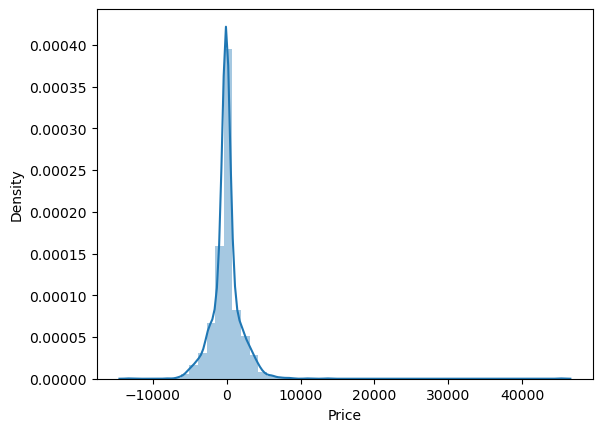

In [75]:
predict(RandomForestRegressor())

In [76]:
from xgboost import XGBRegressor


Training score : 0.9416311608524169


r2 score : 0.8409927332966509
MAE : 1176.8428614597472
RMSE : 1788.7761104465947
MAPE : 13.348201523418634


/var/folders/1r/d9gtx_q511v7f19mk0_z468r0000gn/T/ipykernel_63296/4023557932.py:15: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




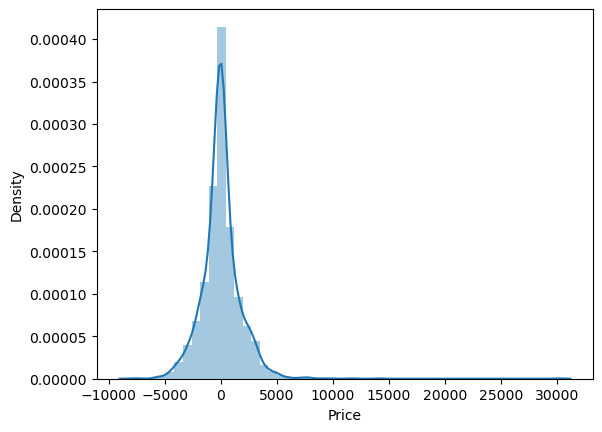

In [77]:
predict(XGBRegressor())

In [78]:
from sklearn.model_selection import RandomizedSearchCV

In [79]:

reg_rf = RandomForestRegressor()
np.linspace(start =100 , stop=1200 , num=50)


# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start =100 , stop=1200 , num=50)]

# Number of features to consider at every split
max_features = ["auto", "sqrt"]

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start =5 , stop=30 , num=20)]

# Minimum number of samples required to split a node
min_samples_split = [5,10,15,100]


random_grid = {
    'n_estimators' : n_estimators ,
    'max_features' : max_features ,
    'max_depth' : max_depth ,
    'min_samples_split' : min_samples_split
}

In [80]:
rf_random = RandomizedSearchCV(estimator=reg_rf , param_distributions=random_grid , cv=5 , n_jobs=-1 , verbose=2)

In [81]:
rf_random.fit(x_train , y_train)
rf_random.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/Users/suchitsharma/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/suchitsharma/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/Users/suchitsharma/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter a

{'n_estimators': 840,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 18}

In [82]:
rf_random.best_estimator_


RandomForestRegressor(max_depth=18, max_features='auto', min_samples_split=10,
                      n_estimators=840)

In [83]:
rf_random.best_score_

0.800889822763336

[CV] END max_depth=11, max_features=auto, min_samples_split=15, n_estimators=1155; total time=  26.1s
[CV] END max_depth=12, max_features=sqrt, min_samples_split=5, n_estimators=616; total time=   5.1s
[CV] END max_depth=22, max_features=sqrt, min_samples_split=15, n_estimators=122; total time=   1.0s
[CV] END max_depth=22, max_features=sqrt, min_samples_split=15, n_estimators=122; total time=   1.0s
[CV] END max_depth=28, max_features=auto, min_samples_split=10, n_estimators=1155; total time=  30.0s
[CV] END max_depth=23, max_features=sqrt, min_samples_split=100, n_estimators=930; total time=   6.0s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=15, n_estimators=189; total time=   1.8s
[CV] END max_depth=20, max_features=sqrt, min_samples_split=15, n_estimators=189; total time=   1.7s
[CV] END max_depth=26, max_features=sqrt, min_samples_split=10, n_estimators=526; total time=   4.5s
[CV] END max_depth=26, max_features=sqrt, min_samples_split=10, n_estimators=526; total t